In [3]:
#Import libraries
import mysql.connector as mysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#Connect to MySQL Database
conn=(mysql.connect(
        host='localhost',
        user='root',
        password='icantsayit1212',
        database='employee'
    )
)

#Define query for extract data from database for india
query='select * from tech_layoffs where country="india";'

#Load data into DataFrame from database
Data=pd.read_sql(query,conn)

#clean 'Money_Raised_in_mil' column: remove $, convert to INR
Data['Money_Raised_in_mil']=(Data['Money_Raised_in_$_mil'].replace('[\$,]','',regex=True).replace('',0).astype(int))*86.15

#update data types for columns
Data=Data.astype({
    'Date_layoffs':'datetime64[ns]',
    'Money_Raised_in_mil':'int'
})

#remove duplicates
Data=Data.drop_duplicates()

#Rename column
Data['Location']=Data['Location_HQ'].rename('Location')

#Drop unnecessay columns
Data=Data.drop(columns=['#','lat','lng','Continent','Money_Raised_in_$_mil','Year','Location_HQ'])

#clean data
Data

,Company,Country,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_mil,Location
0,ShareChat,India,200,2023-12-20,15.0,1333,1133,Consumer,Series H,146455,Bengaluru
1,Udaan,India,100,2023-12-18,10.0,1000,900,Retail,Unknown,0,Bengaluru
2,ZestMoney,India,150,2023-12-05,100.0,150,0,Finance,Series C,10338,Bengaluru
3,Loco,India,40,2023-11-30,36.0,111,71,Consumer,Acquired,4479,Mumbai
4,Physics Wallah,India,120,2023-11-19,1.0,12000,11880,Education,Series A,8615,Noida
...,...,...,...,...,...,...,...,...,...,...,...
104,Swiggy,India,400,2024-01-25,7.0,5714,5314,Food,Unknown,310140,Bengaluru
105,Inmobi,India,125,2024-01-11,5.0,2500,2375,Marketing,Unknown,27568,Bengaluru
106,Flipkart,India,1100,2024-01-08,5.0,22000,20900,Retail,Acquired,1111335,Bengaluru
107,ShareChat,India,200,2023-12-20,15.0,1333,1133,Consumer,Series H,146455,Bengaluru


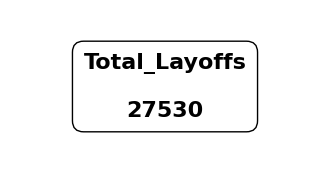

In [4]:
Data
Total_Laid_off=Data['Laid_Off'].sum()
fig,ax=plt.subplots(figsize=(4,2))
ax.axis('off')
ax.text(0.5,0.5,f'Total_Layoffs\n\n{Total_Laid_off}',
    ha='center',
    va='center',
    fontsize=16,
    fontweight='bold',
    bbox=dict(facecolor='white',edgecolor='black',boxstyle='round,pad=0.5'))
plt.show()

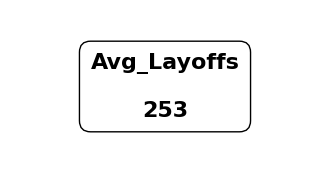

In [5]:
Data
Avg_Laid_off=round(Data['Laid_Off'].mean())
fig,ax=plt.subplots(figsize=(4,2))
ax.axis('off')
ax.text(0.5,0.5,f'Avg_Layoffs\n\n{Avg_Laid_off}',
    ha='center',
    va='center',
    fontsize=16,
    fontweight='bold',
    bbox=dict(facecolor='white',edgecolor='black',boxstyle='round,pad=0.5'))
plt.show()

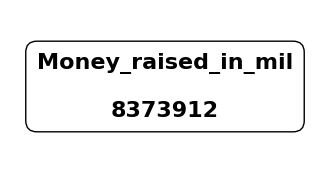

In [6]:
Data
Total_money_raise=Data['Money_Raised_in_mil'].sum()
fig,ax=plt.subplots(figsize=(4,2))
ax.axis('off')
ax.text(0.5,0.5,f'Money_raised_in_mil\n\n{Total_money_raise}',
    ha='center',
    va='center',
    fontsize=16,
    fontweight='bold',
    bbox=dict(facecolor='white',edgecolor='black',boxstyle='round,pad=0.5'))
plt.show()

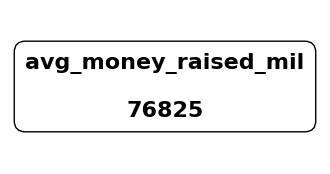

In [7]:
Data
Avg_money_raise=round(Data['Money_Raised_in_mil'].mean())
fig,ax=plt.subplots(figsize=(4,2))
ax.axis('off')
ax.text(0.5,0.5,f'avg_money_raised_mil\n\n{Avg_money_raise}',
    ha='center',
    va='center',
    fontsize=16,
    fontweight='bold',
    bbox=dict(facecolor='white',edgecolor='black',boxstyle='round,pad=0.5'))
plt.show()

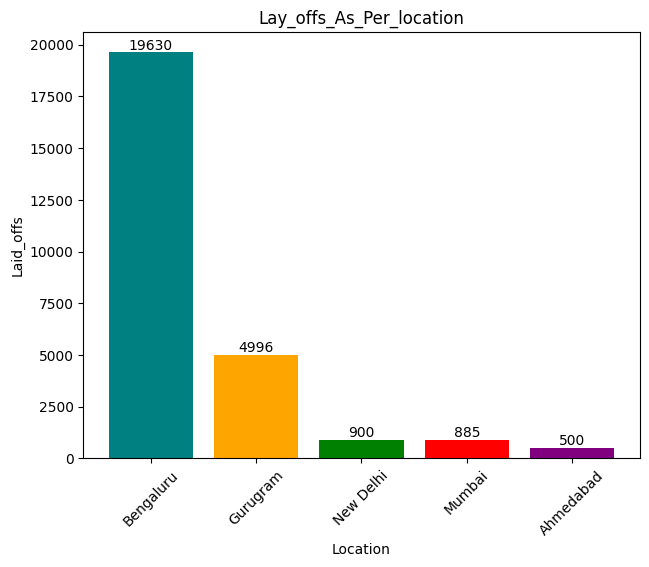

In [8]:
Data

#add colors list for bar color
colr= [
    'Teal',
    'Orange',
    'Green',
    'Red',
    'Purple']


#Grouped by location as per laidoffs
lay_of_per_location=Data.groupby('Location')['Laid_Off'].sum().sort_values(ascending=False)[:5]

#Plot a column chart
bar=plt.bar(lay_of_per_location.index,lay_of_per_location.values,color=colr)

#Add data label
plt.bar_label(bar)

#give tight layout
plt.tight_layout()

#add rotation for better visibillity
plt.xticks(rotation=45)

#Add title
plt.title('Lay_offs_As_Per_location')

#Add xtitle
plt.xlabel('Location')

#Add xtitle
plt.ylabel('Laid_offs')
plt.show()

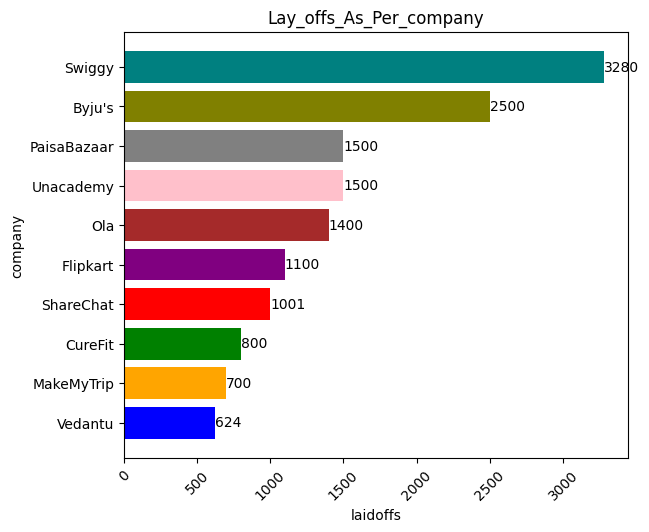

In [9]:
Data

#add colors list for bar color
colr= [
    'Blue',
    'Orange',
    'Green',
    'Red',
    'Purple',
    'Brown',
    'Pink',
    'Gray',
    'Olive',
    'Teal',
]

#Group and sort data
lay_of_per_company=Data.groupby('Company')['Laid_Off'].sum().sort_values(ascending=False)[:10]

#zipping the values
Zip=zip(lay_of_per_company.values,lay_of_per_company.index)

#Defines x and y
y,x=zip(*Zip)

#reverse x and y value
x=x[::-1]
y=y[::-1]

#plot a bar chart
bar=plt.barh(x,y,color=colr)

#Add data label
plt.bar_label(bar)

#give tight layout
plt.tight_layout()

#add rotation for better visibillity
plt.xticks(rotation=45)

#Add title
plt.title('Lay_offs_As_Per_company')

#Add xtitle
plt.xlabel('laidoffs')

#Add xtitle
plt.ylabel('company')
plt.show()

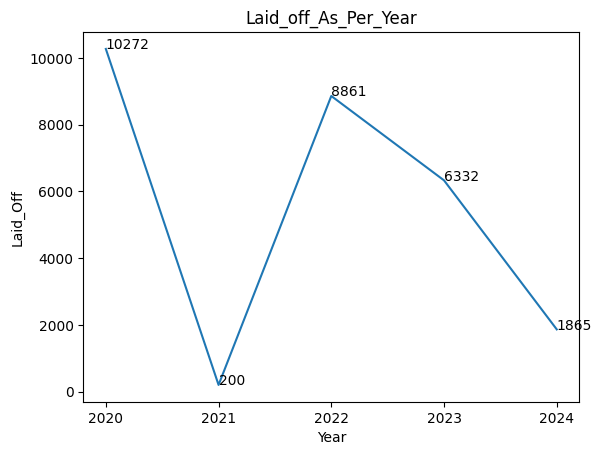

In [10]:
Data

#Group data
Laid_offs_as_per_year=Data.groupby(Data['Date_layoffs'].dt.year)['Laid_Off'].sum()

#add a custom plot
fig,ax=plt.subplots()

# set x position 
x_pos=np.arange(len(Laid_offs_as_per_year))

#run a loop for data labels
for x in x_pos:
    ax.text(x,Laid_offs_as_per_year.values[x],str(Laid_offs_as_per_year.values[x]))
    
#ploting the line chart
ax.plot(x_pos,Laid_offs_as_per_year.values)

#customize x-axis
plt.xticks(x_pos,Laid_offs_as_per_year.index)

#add x label
plt.xlabel('Year')

#add y label
plt.ylabel('Laid_Off')

#add title
plt.title('Laid_off_As_Per_Year')

plt.show()

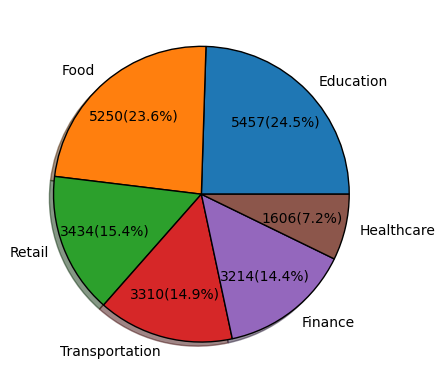

In [11]:
Data
#group data
Laid_off_By_Industry=Data.groupby('Industry')['Laid_Off'].sum().sort_values(ascending=False)[:6]

#add a custome function to showing values and percentage both
def abs_val(val):
    Total=sum(Laid_off_By_Industry.values)
    return f'{round((val*Total)/100)}({val:.1f}%)'
    
#plot a pie chart
plt.pie(Laid_off_By_Industry.values,labels=(Laid_off_By_Industry.index),
        autopct=abs_val,
        pctdistance=0.7,
        shadow=True,
        textprops=dict(fontsize=10),
        wedgeprops=dict(edgecolor='black'))
plt.show()


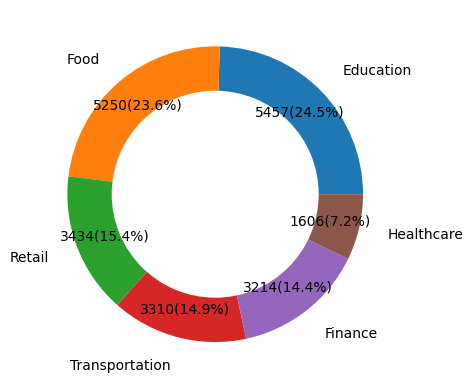

In [12]:
Data
#group data
Laid_off_By_Tage=Data.groupby('Stage')['Laid_Off'].sum().sort_values(ascending=False)[:6]

#add a custome function to showing values and percentage both
def abs_val(val):
    Total=sum(Laid_off_By_Industry.values)
    return f'{round((val*Total)/100)}({val:.1f}%)'
    
#plot a doughnut chart
plt.pie(Laid_off_By_Industry.values,labels=(Laid_off_By_Industry.index),
        autopct=abs_val,
        pctdistance=0.8,
        labeldistance=1.2)

#plot a subplot
plt.pie([1],radius=0.7,colors='white')
plt.show()